In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')
#执行第一步，连接谷歌云盘

Mounted at /content/drive


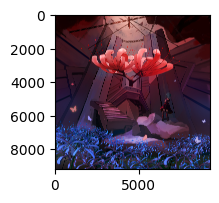

In [5]:
I = mpimg.imread('/content/drive/MyDrive/python 研究/6彼岸开绽2 .jpg')
plt.figure(figsize=(2,2))
plt.imshow(I)
#检查是否连上了谷歌云

# 从云盘中构建图

In [6]:
df = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/徐州线路节点链接关系.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/徐州线路节点属性.csv')

In [7]:
# 过滤空节点
df = df.dropna(subset=["前一节点", "后一节点"])
G = nx.from_pandas_edgelist(df,"前一节点","后一节点", edge_attr=True, create_using=nx.MultiGraph())  #edge_attr=True,边的属性信息也要导入

In [8]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']
    attr4 = row['300M内文保单位/古迹遗址/宗祠故地的个数']
    attr5 = row['800M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G.add_node(node)
        G.nodes[node]['区域属性'] = attr1
        G.nodes[node]['线路'] = attr2
        G.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3

        G.nodes[node]['300M内文保单位/古迹遗址/宗祠故地的个数'] = attr4

        G.nodes[node]['800M内文保单位/古迹遗址/宗祠故地的个数'] = attr5


In [9]:
#查看节点的属性
for node, attrs in G.nodes.data():
    print("Node:", node)
    print("Attributes:", attrs)
    print()

Node: 徐州站
Attributes: {'区域属性': '云龙区', '线路': '51路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 1.0}

Node: 万虹桥电子市场
Attributes: {'区域属性': '鼓楼区', '线路': '609路', '500M内文保单位/古迹遗址/宗祠故地的个数': 5.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 2.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 11.0}

Node: 供销大厦
Attributes: {'区域属性': '鼓楼区', '线路': '39路', '500M内文保单位/古迹遗址/宗祠故地的个数': 7.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 2.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 9.0}

Node: 古彭大厦
Attributes: {'区域属性': '泉山区', '线路': '76路', '500M内文保单位/古迹遗址/宗祠故地的个数': 4.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 3.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 6.0}

Node: 市二院
Attributes: {'区域属性': '泉山区', '线路': '76路', '500M内文保单位/古迹遗址/宗祠故地的个数': 2.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 2.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 7.0}

Node: 工人医院市口腔医院
Attributes: {'区域属性': '泉山区', '线路': '616路', '500M内文保单位/古迹遗址/宗祠故地的个数': 1.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 1.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 3.0}

Node: 矿务局华美商厦
Attributes: {'区域属性': '泉山区', '线路': '616路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 0.

In [10]:
#查看边属性
for u, v, attr in G.edges(data=True):
    print(f"边 ({u}, {v}) 的属性:")
    for key, value in attr.items():
        print(f"{key}: {value}")
    print()

边 (徐州站, 万虹桥电子市场) 的属性:
attribute: 1路

边 (徐州站, 万虹桥电子市场) 的属性:
attribute: 双层观光巴士旅游线

边 (徐州站, 万虹桥电子市场) 的属性:
attribute: 11路

边 (徐州站, 万虹桥电子市场) 的属性:
attribute: 20路

边 (徐州站, 万虹桥电子市场) 的属性:
attribute: 41路

边 (徐州站, 徐州站(朝阳)) 的属性:
attribute: 3路

边 (徐州站, 徐州站(蓝天)) 的属性:
attribute: 51路

边 (万虹桥电子市场, 供销大厦) 的属性:
attribute: 1路

边 (万虹桥电子市场, 供销大厦) 的属性:
attribute: 双层观光巴士旅游线

边 (万虹桥电子市场, 供销大厦) 的属性:
attribute: 11路

边 (万虹桥电子市场, 民主南路) 的属性:
attribute: 20路

边 (万虹桥电子市场, 第三中学) 的属性:
attribute: 41路

边 (万虹桥电子市场, 第三中学) 的属性:
attribute: 609路

边 (万虹桥电子市场, 青年路口) 的属性:
attribute: 609路

边 (供销大厦, 古彭大厦) 的属性:
attribute: 1路

边 (供销大厦, 彭城饭店) 的属性:
attribute: 双层观光巴士旅游线

边 (供销大厦, 中山南路(中枢街)) 的属性:
attribute: 11路

边 (供销大厦, 金地商都) 的属性:
attribute: 39路

边 (供销大厦, 户部山地铁站) 的属性:
attribute: 39路

边 (古彭大厦, 市二院) 的属性:
attribute: 1路

边 (古彭大厦, 市二院) 的属性:
attribute: 608路

边 (古彭大厦, 市二院) 的属性:
attribute: 76路

边 (古彭大厦, 中山南路(中枢街)) 的属性:
attribute: 608路

边 (古彭大厦, 金地商都) 的属性:
attribute: 76路

边 (市二院, 工人医院市口腔医院) 的属性:
attribute: 1路

边 (市二院, 徐州博爱口腔医院) 的属性:
attribute: 60

In [11]:
# 获取图G的节点数量
num_nodes = G.number_of_nodes()

print("图G的节点数量为:", num_nodes)

图G的节点数量为: 473


# 获取邻接矩阵

In [12]:
# 获取邻接矩阵
adj_matrix = nx.adjacency_matrix(G)  # nx.adjacency_matrix(G)



# 将邻接矩阵转换为NumPy数组
adj_array = adj_matrix.toarray()

#打印邻接矩阵
print(adj_array[10])
print(len(adj_array))


[0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
473


In [13]:
import numpy as np
from scipy.sparse import issparse

def is_adjacency_matrix(adj_matrix, directed=False, allow_self_loops=False):
    """
    检测一个矩阵是否是标准的邻接矩阵。

    参数：
    adj_matrix: np.ndarray 或 scipy.sparse - 输入的矩阵
    directed: bool - 是否允许有向图，默认为 False（即无向图）
    allow_self_loops: bool - 是否允许自环，默认为 False

    返回：
    bool - 如果是标准的邻接矩阵返回 True，否则返回 False
    """
    # 如果是稀疏矩阵，先转为密集矩阵
    if issparse(adj_matrix):
        adj_matrix = adj_matrix.toarray()

    # 检查是否是方阵
    if adj_matrix.shape[0] != adj_matrix.shape[1]:
        return False

    # 检查是否非负
    if not np.all(adj_matrix >= 0):
        return False

    # 检查对称性（无向图）
    if not directed and not np.array_equal(adj_matrix, adj_matrix.T):
        return False

    # 检查主对角线是否为 0（无自环）
    if not allow_self_loops and not np.all(np.diag(adj_matrix) == 0):
        return False

    return True

from scipy.sparse import csr_matrix



print(is_adjacency_matrix(adj_matrix))  # 输出: True


True


In [14]:
#获取节点编号列表
node_ids = list(G.nodes())

# 构建邻接矩阵
adj_matrix = nx.adjacency_matrix(G, nodelist=node_ids)

# 将邻接矩阵转换为DataFrame
df1 = pd.DataFrame(adj_matrix.toarray(), index=node_ids, columns=node_ids)

# 保存DataFrame到CSV文件
#df1.to_csv('/content/drive/MyDrive/python 研究/XXXXX', index=True, header=True)

In [15]:
print(len(list(G.nodes())))
list(G.nodes())[145]

473


'侯山窝'

# 获取节点属性（权重）

In [25]:
node_attributes = G.nodes.data()
target_attribute = '500M内文保单位/古迹遗址/宗祠故地的个数'
attribute=[]


target_attribute_2 = '300M内文保单位/古迹遗址/宗祠故地的个数'
attribute_2=[]


target_attribute_3 = '800M内文保单位/古迹遗址/宗祠故地的个数'
attribute_3=[]


In [26]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute in attributes:
        attribute_value = attributes[target_attribute]

        attribute.append(attribute_value)
    else:
        attribute.append(-1)

    print("节点:", node)
    print("属性:", target_attribute, "=", attribute_value)
    print()

节点: 徐州站
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 万虹桥电子市场
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 5.0

节点: 供销大厦
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 7.0

节点: 古彭大厦
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 市二院
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 2.0

节点: 工人医院市口腔医院
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 矿务局华美商厦
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 段庄
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 六院
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 段南新村
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 公交修造厂
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 市中级法院
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 淮西客运站
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 荣盛城一期
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 荣盛城二期
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 第三十一中学(荣盛城分校)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 荣盛城西
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 杏山子地铁站
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 箐英路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 箐英路(尚和园)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 开元四季
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 杏山子公交首末站
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 西苑人家
属性: 500M内文保单位/古迹遗

In [27]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute_2 in attributes:
        attribute_value = attributes[target_attribute_2]

        attribute_2.append(attribute_value)
    else:
        attribute_2.append(-1)

    print("节点:", node)
    print("属性:", target_attribute_2, "=", attribute_value)
    print()

节点: 徐州站
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 万虹桥电子市场
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 2.0

节点: 供销大厦
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 2.0

节点: 古彭大厦
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 市二院
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 2.0

节点: 工人医院市口腔医院
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 矿务局华美商厦
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 段庄
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 六院
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 段南新村
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 公交修造厂
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 市中级法院
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 淮西客运站
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 荣盛城一期
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 荣盛城二期
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 第三十一中学(荣盛城分校)
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 荣盛城西
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 杏山子地铁站
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 箐英路
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 箐英路(尚和园)
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 开元四季
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 杏山子公交首末站
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 西苑人家
属性: 300M内文保单位/古迹遗

In [28]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute_3 in attributes:
        attribute_value = attributes[target_attribute_3]

        attribute_3.append(attribute_value)
    else:
        attribute_3.append(-1)

    print("节点:", node)
    print("属性:", target_attribute_3, "=", attribute_value)
    print()

节点: 徐州站
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 万虹桥电子市场
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 11.0

节点: 供销大厦
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 9.0

节点: 古彭大厦
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 市二院
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 7.0

节点: 工人医院市口腔医院
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 矿务局华美商厦
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 段庄
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 六院
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 段南新村
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 公交修造厂
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 市中级法院
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 淮西客运站
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 荣盛城一期
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 荣盛城二期
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 第三十一中学(荣盛城分校)
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 荣盛城西
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 杏山子地铁站
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 箐英路
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 箐英路(尚和园)
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 开元四季
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 杏山子公交首末站
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 西苑人家
属性: 800M内文保单位/古迹

In [29]:
#获取权重
attribute=np.array(attribute)
print(attribute.shape)

#获取权重
attribute_2=np.array(attribute_2)
print(attribute_2.shape)

#获取权重
attribute_3=np.array(attribute_3)
print(attribute_3.shape)

(473,)
(473,)
(473,)


In [30]:
#打印权重
print(attribute)
print(attribute_2)
print(attribute_3)

[ 0.  5.  7.  4.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.
  6.  2.  0.  6. 11.  9.  8.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  1.  2.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  1.  3.  2.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  3.  4.  2.  6.  8.  5.  5.  5.  3.  2.  2.  2.  1.  0.  0.  0.
  0.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  3.  5.  5.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  6.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  1.  1.  0.  0.  6.  4.  3.  0.  0.  0.  0

# 获取权重(区域)的方法

In [31]:
node_attributes = G.nodes.data()
target_regional_attribute = '区域属性'
regional_attribute=[]

In [32]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_regional_attribute in attributes:
        attribute_value = attributes[target_regional_attribute]

        regional_attribute.append(attribute_value)
    else:
        regional_attribute.append(-1)

    print("节点:", node)
    print("属性:", target_regional_attribute, "=", attribute_value)
    print()

节点: 徐州站
属性: 区域属性 = 云龙区

节点: 万虹桥电子市场
属性: 区域属性 = 鼓楼区

节点: 供销大厦
属性: 区域属性 = 鼓楼区

节点: 古彭大厦
属性: 区域属性 = 泉山区

节点: 市二院
属性: 区域属性 = 泉山区

节点: 工人医院市口腔医院
属性: 区域属性 = 泉山区

节点: 矿务局华美商厦
属性: 区域属性 = 泉山区

节点: 段庄
属性: 区域属性 = 泉山区

节点: 六院
属性: 区域属性 = 泉山区

节点: 段南新村
属性: 区域属性 = 泉山区

节点: 公交修造厂
属性: 区域属性 = 泉山区

节点: 市中级法院
属性: 区域属性 = 泉山区

节点: 淮西客运站
属性: 区域属性 = 泉山区

节点: 荣盛城一期
属性: 区域属性 = 泉山区

节点: 荣盛城二期
属性: 区域属性 = 泉山区

节点: 第三十一中学(荣盛城分校)
属性: 区域属性 = 泉山区

节点: 荣盛城西
属性: 区域属性 = 泉山区

节点: 杏山子地铁站
属性: 区域属性 = 泉山区

节点: 箐英路
属性: 区域属性 = 泉山区

节点: 箐英路(尚和园)
属性: 区域属性 = 泉山区

节点: 开元四季
属性: 区域属性 = 泉山区

节点: 杏山子公交首末站
属性: 区域属性 = 泉山区

节点: 西苑人家
属性: 区域属性 = 鼓楼区

节点: 民乐园
属性: 区域属性 = 泉山区

节点: 西苑农贸市场
属性: 区域属性 = 泉山区

节点: 西苑东口
属性: 区域属性 = 泉山区

节点: 水漫桥
属性: 区域属性 = 泉山区

节点: 沈场市场
属性: 区域属性 = 泉山区

节点: 合群新村
属性: 区域属性 = 泉山区

节点: 苏堤北路立交桥
属性: 区域属性 = 鼓楼区

节点: 和园爱家
属性: 区域属性 = 鼓楼区

节点: 空军后勤学院
属性: 区域属性 = 鼓楼区

节点: 九龙湖公园
属性: 区域属性 = 鼓楼区

节点: 港南小区
属性: 区域属性 = 鼓楼区

节点: 建材中专
属性: 区域属性 = 鼓楼区

节点: 地质五队宿舍
属性: 区域属性 = 鼓楼区

节点: 堤北市场
属性: 区域属性 = 鼓楼区

节点: 下淀桥西
属性: 区域属性 = 鼓楼区

节点: 白云山
属性: 区域

In [33]:
#获取权重
regional_attribute=np.array(regional_attribute)
regional_attribute.shape

(473,)

In [34]:
#打印权重
print(regional_attribute)

['云龙区' '鼓楼区' '鼓楼区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区'
 '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '鼓楼区' '泉山区'
 '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区'
 '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '云龙区' '云龙区' '云龙区' '云龙区' '贾汪区' '贾汪区' '贾汪区'
 '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '云龙区' '云龙区' '泉山区' '云龙区' '云龙区' '云龙区'
 '云龙区' '云龙区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区'
 '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓楼区' '贾汪区' '贾汪区' '贾汪区' '贾汪区' '贾汪区'
 '贾汪区' '云龙区' '云龙区' '云龙区' '云龙区' '泉山区' '云龙区' '泉山区' '泉山区' '泉山区' '云龙区' '云龙区'
 '云龙区' '云龙区' '云龙区' '云龙区' '云龙区' '云龙区' '云龙区' '云龙区' '云龙区' '云龙区' '云龙区' '云龙区'
 '云龙区' '云龙区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区'
 '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '铜山区' '铜山区' '铜山区'
 '铜山区' '铜山区' '铜山区' '铜山区' '铜山区' '铜山区' '铜山区' '铜山区' '泉山区' '泉山区' '泉山区' '泉山区'
 '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '云龙区' '鼓楼区' '鼓楼区'
 '泉山区' '泉山区' '泉山区' '泉山区' '泉山区' '鼓楼区' '鼓楼区' '鼓楼区' '鼓

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


sklearn.preprocessing 模块包含了多种数据预处理和标准化的算法。

LabelEncoder和OneHotEncoder都是其中的类,用于分类数据的编码转换。

In [36]:
# 创建LabelEncoder
le = LabelEncoder()
# 对district_names进行编码
district_encoded = le.fit_transform(regional_attribute)

# 创建OneHotEncoder
ohe = OneHotEncoder()
# 对编码后的结果进行独热编码
district_onehot = ohe.fit_transform(district_encoded.reshape(-1,1)).toarray()

In [37]:
print(district_onehot)
print(len(district_onehot))
print(district_onehot[10])
print(district_onehot[14])

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
473
[0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]


# 将图的边转换为edge_index

In [38]:
 #获取图的边列表
edge_list = list(G.edges())

# 将边列表转换为 edge_index
edge_index = np.array(edge_list).T

# 打印结果
edge_index= np.array(edge_index)
edge_index

array([['徐州站', '徐州站', '徐州站', ..., '水文阁', '彭城派出所', '丰储街-奎河交界'],
       ['万虹桥电子市场', '万虹桥电子市场', '万虹桥电子市场', ..., '云龙湖', '丰储街-奎河交界', '马鞍桥']],
      dtype='<U14')

In [39]:
#查看边的数量
edge_index.shape

(2, 796)

**提取纯数字的edge_index**

In [40]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G2 = nx.convert_node_labels_to_integers(G)
# 获取图的边列表
edge_list_number = list(G2.edges())
# 将边列表转换为 edge_index
edge_index_number = np.array(edge_list_number).T

# 打印结果
edge_index_number= np.array(edge_index_number)
print(edge_index_number)
print(edge_index_number.shape)

#shape 格式与上方一致即可进行下一步

[[  0   0   0 ... 467 469 470]
 [  1   1   1 ... 468 470 471]]
(2, 796)


**创建节点映射字典**

In [41]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G_int_labels = nx.convert_node_labels_to_integers(G)

In [42]:
#dir(G_int_labels)   #查看G_int_labels 支持的后缀
G_int_labels.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [43]:
list1=G_int_labels.nodes
list1=np.array(list1)
list1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [44]:
list_1=G.nodes.data()
list_1=np.array(list_1)
print(list_1[6][0])

list_2=list_1
list2 = []  # 创建一个空列表，用于存储遍历结果

for item in list_2:
    list2.append(item[0])

list2=np.array(list2)

#list2 #此处可以查看list2

矿务局华美商厦


In [45]:
list1 = list1
list2 = list2
mapping_dict = { }  # 创建一个空字典

for i in range(len(list1)):
    key = str(list1[i])  # 将整数转换为字符串作为键
    value = list2[i]  # 节点名称作为值
    mapping_dict[key] = value

In [46]:
mapping_dict["162"]

'豪绅嘉苑'

In [47]:
mapping_dict

{'0': '徐州站',
 '1': '万虹桥电子市场',
 '2': '供销大厦',
 '3': '古彭大厦',
 '4': '市二院',
 '5': '工人医院市口腔医院',
 '6': '矿务局华美商厦',
 '7': '段庄',
 '8': '六院',
 '9': '段南新村',
 '10': '公交修造厂',
 '11': '市中级法院',
 '12': '淮西客运站',
 '13': '荣盛城一期',
 '14': '荣盛城二期',
 '15': '第三十一中学(荣盛城分校)',
 '16': '荣盛城西',
 '17': '杏山子地铁站',
 '18': '箐英路',
 '19': '箐英路(尚和园)',
 '20': '开元四季',
 '21': '杏山子公交首末站',
 '22': '西苑人家',
 '23': '民乐园',
 '24': '西苑农贸市场',
 '25': '西苑东口',
 '26': '水漫桥',
 '27': '沈场市场',
 '28': '合群新村',
 '29': '苏堤北路立交桥',
 '30': '和园爱家',
 '31': '空军后勤学院',
 '32': '九龙湖公园',
 '33': '港南小区',
 '34': '建材中专',
 '35': '地质五队宿舍',
 '36': '堤北市场',
 '37': '下淀桥西',
 '38': '白云山',
 '39': '二七宿舍',
 '40': '大庆路',
 '41': '响山南路',
 '42': '奥运城',
 '43': '王杰部队',
 '44': '九七医院',
 '45': '城东快速路(振兴大道)',
 '46': '徐州东站北',
 '47': '徐州东站(东广场)',
 '48': '徐州乐园',
 '49': '矿大南湖校区北门',
 '50': '金山公园',
 '51': '云龙山索道',
 '52': '云龙湖旅游风景区',
 '53': '云龙山',
 '54': '云龙山东',
 '55': '积翠新村',
 '56': '南京银行',
 '57': '戏马台',
 '58': '户部山地铁站',
 '59': '云龙医院',
 '60': '彭城饭店',
 '61': '徐州站(朝阳)',
 '62': '四道街',
 '63': '

In [48]:
#建立反向查询字典
mapping_dict_r = { }  # 创建一个空字典

for i in range(len(list2)):
    key = str(list2[i])  # 将整数转换为字符串作为键
    value = list1[i]  # 节点名称作为值
    mapping_dict_r[key] = value

In [49]:
mapping_dict_r["豪绅嘉苑"]

162

# 统计已有信息

In [50]:
#邻接矩阵
print(adj_array)
print(adj_array.shape)

[[0 5 0 ... 0 0 0]
 [5 0 3 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
(473, 473)


In [51]:
#500m内古迹的数量，作为权重
print(attribute)
print(attribute.shape)

[ 0.  5.  7.  4.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.
  6.  2.  0.  6. 11.  9.  8.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  1.  2.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  1.  3.  2.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  3.  4.  2.  6.  8.  5.  5.  5.  3.  2.  2.  2.  1.  0.  0.  0.
  0.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  3.  5.  5.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  6.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  1.  1.  0.  0.  6.  4.  3.  0.  0.  0.  0

In [52]:
#300m内古迹的数量，作为权重
print(attribute_2)
print(attribute_2.shape)

[0. 2. 2. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 2. 0. 0. 1. 3. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 2. 1. 1. 3. 2. 2. 3. 2. 1. 0. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 2. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 2. 2. 6. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [53]:
#800m内古迹的数量，作为权重
print(attribute_3)
print(attribute_3.shape)

[ 1. 11.  9.  6.  7.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  4.
  6.  4.  5. 10. 13. 13. 11.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0. 11.  8.  6.  0.  3.
  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  5.  1.  2.  5.  5.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  5.  6.  5.  4. 12. 14.  7. 11.  9.  7.  6.  5.  5.  2.  0.  0.  0.
  1.  3.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  3.  6. 13.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  9.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  3.  2.  2.  1.  0.  6.  6.  8.  0.  0.  0.  0

In [68]:
#检查权重是否都大于等于0，如果不是，那么权重矩阵有问题。 自行修改arr的值进行检查
arr = attribute

if (arr >= 0).all():
  print('True')
else:
  print('False')

True


**拼接邻接矩阵和古迹数量矩阵和区域矩阵**

In [55]:
print(district_onehot)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [56]:
district_onehot=np.array(district_onehot)#将独热编码转换为np数组

In [57]:
district_onehot.T.shape#查看转置

(6, 473)

In [58]:
matrix_onehot_unite= np.concatenate((adj_array, district_onehot), axis=1)#将邻接矩阵和独热编码拼接

In [59]:
matrix_onehot_unite.shape

(473, 479)

**拼接邻接矩阵独热编码矩阵+古迹数量矩阵(473+6+1+1+1)**

In [60]:
attribute_combined=np.concatenate((matrix_onehot_unite, attribute.reshape(-1,1)), axis=1)
attribute_combined_1=np.concatenate((attribute_combined, attribute_2.reshape(-1,1)), axis=1)
attribute_combined_1=np.concatenate((attribute_combined_1, attribute_3.reshape(-1,1)), axis=1)
print(attribute_combined_1.shape)
print(len(attribute_combined_1))

(473, 482)
473


**参考标签制作，此处需要将古迹数量的节点进行归类**

In [61]:
#此处需要将古迹数量的节点进行归类，可以选择3类4类都可以，这个归类会影响最终结果。这是计算机在向你询问边界是什么样子的。
#注意调整range的值，针对徐州，因为有三个层级的数据，可以考虑加权求和。
attribute_label=[]
for i in range(len(attribute_combined_1)):
  if (attribute[i]*1.0+attribute_3[i]*0.5+(attribute_3[i]-attribute[i])*0.2)<3 :
    attribute_label.append(0)
  elif (attribute[i]*1.0+attribute_3[i]*0.5+(attribute_3[i]-attribute[i])*0.2)<=6:
    attribute_label.append(1)
  else:
    attribute_label.append(2)


attribute_label=np.array(attribute_label)
attribute_label.shape

(473,)

**点和点的链接关系**

In [62]:
#点和点的连接关系，另一种表现形式,从边的角度考虑
print(edge_index)
print(edge_index.shape)

[['徐州站' '徐州站' '徐州站' ... '水文阁' '彭城派出所' '丰储街-奎河交界']
 ['万虹桥电子市场' '万虹桥电子市场' '万虹桥电子市场' ... '云龙湖' '丰储街-奎河交界' '马鞍桥']]
(2, 796)


In [63]:
print(edge_index_number)
print(edge_index_number.shape)

[[  0   0   0 ... 467 469 470]
 [  1   1   1 ... 468 470 471]]
(2, 796)


**节点和数字间的映射关系**

In [64]:
#节点和数字间的映射关系
print(mapping_dict)
print(len(mapping_dict))

{'0': '徐州站', '1': '万虹桥电子市场', '2': '供销大厦', '3': '古彭大厦', '4': '市二院', '5': '工人医院市口腔医院', '6': '矿务局华美商厦', '7': '段庄', '8': '六院', '9': '段南新村', '10': '公交修造厂', '11': '市中级法院', '12': '淮西客运站', '13': '荣盛城一期', '14': '荣盛城二期', '15': '第三十一中学(荣盛城分校)', '16': '荣盛城西', '17': '杏山子地铁站', '18': '箐英路', '19': '箐英路(尚和园)', '20': '开元四季', '21': '杏山子公交首末站', '22': '西苑人家', '23': '民乐园', '24': '西苑农贸市场', '25': '西苑东口', '26': '水漫桥', '27': '沈场市场', '28': '合群新村', '29': '苏堤北路立交桥', '30': '和园爱家', '31': '空军后勤学院', '32': '九龙湖公园', '33': '港南小区', '34': '建材中专', '35': '地质五队宿舍', '36': '堤北市场', '37': '下淀桥西', '38': '白云山', '39': '二七宿舍', '40': '大庆路', '41': '响山南路', '42': '奥运城', '43': '王杰部队', '44': '九七医院', '45': '城东快速路(振兴大道)', '46': '徐州东站北', '47': '徐州东站(东广场)', '48': '徐州乐园', '49': '矿大南湖校区北门', '50': '金山公园', '51': '云龙山索道', '52': '云龙湖旅游风景区', '53': '云龙山', '54': '云龙山东', '55': '积翠新村', '56': '南京银行', '57': '戏马台', '58': '户部山地铁站', '59': '云龙医院', '60': '彭城饭店', '61': '徐州站(朝阳)', '62': '四道街', '63': '地下道', '64': '下淀瑞博医院', '65': '下淀地铁站', '66': '二九宿舍', '67': '徐州物资市

In [65]:
#节点和数字间的映射关系(翻转)
reversed_dict = {value: key for key, value in mapping_dict.items()}
print(reversed_dict)

{'徐州站': '0', '万虹桥电子市场': '1', '供销大厦': '2', '古彭大厦': '3', '市二院': '4', '工人医院市口腔医院': '5', '矿务局华美商厦': '6', '段庄': '7', '六院': '8', '段南新村': '9', '公交修造厂': '10', '市中级法院': '11', '淮西客运站': '12', '荣盛城一期': '13', '荣盛城二期': '14', '第三十一中学(荣盛城分校)': '15', '荣盛城西': '16', '杏山子地铁站': '17', '箐英路': '18', '箐英路(尚和园)': '19', '开元四季': '20', '杏山子公交首末站': '21', '西苑人家': '22', '民乐园': '23', '西苑农贸市场': '24', '西苑东口': '25', '水漫桥': '26', '沈场市场': '27', '合群新村': '28', '苏堤北路立交桥': '29', '和园爱家': '30', '空军后勤学院': '31', '九龙湖公园': '32', '港南小区': '33', '建材中专': '34', '地质五队宿舍': '35', '堤北市场': '36', '下淀桥西': '37', '白云山': '38', '二七宿舍': '39', '大庆路': '40', '响山南路': '41', '奥运城': '42', '王杰部队': '43', '九七医院': '44', '城东快速路(振兴大道)': '45', '徐州东站北': '46', '徐州东站(东广场)': '47', '徐州乐园': '48', '矿大南湖校区北门': '49', '金山公园': '50', '云龙山索道': '51', '云龙湖旅游风景区': '52', '云龙山': '53', '云龙山东': '54', '积翠新村': '55', '南京银行': '56', '戏马台': '57', '户部山地铁站': '58', '云龙医院': '59', '彭城饭店': '60', '徐州站(朝阳)': '61', '四道街': '62', '地下道': '63', '下淀瑞博医院': '64', '下淀地铁站': '65', '二九宿舍': '66', '徐州物资市场': '6

**掩码的的制作**

In [69]:
total_nodes = len(attribute_label)#此处相比福州作了改进，我们直接用古迹数量权重列表的长度作为节点总数量
num_false = 190

mask_1 = np.array([False] * num_false + [True] * (total_nodes - num_false))
np.random.shuffle(mask_1)

In [70]:
print(mask_1)
print(mask_1.shape)

[ True False  True  True False False  True False False False False False
 False  True  True False  True  True  True  True False  True  True False
  True  True  True  True False False False  True False  True False False
 False  True  True  True  True False False  True  True False  True  True
 False  True  True  True  True False  True False  True False  True False
 False False  True False  True  True  True  True  True False  True False
  True False  True  True  True  True False  True False  True False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False  True  True False  True  True  True  True
  True False False  True False  True False  True False False False  True
  True  True  True False  True False  True False False  True  True False
 False  True  True  True False  True  True False  True False  True False
  True False False  True  True  True  True False False False  True  True
  True  True False False False  True False False  T

# 分支：图自编码器方法（见昆明ipynb）

In [ ]:
pip install torch_geometric

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

In [ ]:


# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_label # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3   attribute_combined_1
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))

In [ ]:
# 假设 data.b 是初始特征矩阵，data.inde_edge 是边列表
# 请确保 data.b 和 data.inde_edge 已定义并正确地导入
node_features = torch.tensor(attribute_combined_1, dtype=torch.float32)  # 确保数据类型是 float32
edge_index = torch.tensor(adj_matrix.nonzero(), dtype=torch.long)  # 边列表通常是 long 类型

In [ ]:
# 创建 PyTorch Geometric 的数据对象
graph_data = Data(x=node_features, edge_index=edge_index)

**定义图自编码器**

In [ ]:
class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphAutoencoder, self).__init__()
        # 编码器部分
        self.encoder = GCNConv(input_dim, hidden_dim)
        self.hidden_layer = GCNConv(hidden_dim, hidden_dim)
        self.z_layer = GCNConv(hidden_dim, output_dim)

    def encode(self, x, edge_index):
        x = self.encoder(x, edge_index)
        x = F.relu(x)
        x = self.hidden_layer(x, edge_index)
        x = F.relu(x)
        z = self.z_layer(x, edge_index)
        return z

    def decode(self, z, edge_index):
        # 使用内积解码边缘信息
        return torch.sigmoid((z[edge_index[0]] * z[edge_index[1]]).sum(dim=1))

    def forward(self, x, edge_index):
        z = self.encode(x, edge_index)
        reconstructed_edges = self.decode(z, edge_index)
        return z, reconstructed_edges

# 定义模型、损失函数和优化器
input_dim = node_features.shape[1]  # 411
hidden_dim = 10  # 可以自行调整
output_dim = 3  # 目标嵌入维度

model = GraphAutoencoder(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()  # 使用二元交叉熵损失函数进行链接重建


In [ ]:
# 训练过程
def train_model():  # 确保使用正确的函数名称
    model.train()
    optimizer.zero_grad()
    z, reconstructed_edges = model(graph_data.x, graph_data.edge_index)
    # 使用边连接来计算重构损失
    loss = criterion(reconstructed_edges, torch.ones(edge_index.size(1), dtype=torch.float32))
    loss.backward()
    optimizer.step()
    return loss.item()

In [ ]:
# 训练模型
loss_remember_AE=[]

num_epochs = 50  # 可以根据需要调整
for epoch in range(num_epochs):
    loss = train_model()  # 确保调用正确的训练函数
    loss_remember_AE.append(loss)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')
        time.sleep(0.1)

Epoch 0, Loss: 0.6862
Epoch 10, Loss: 0.0010
Epoch 20, Loss: 0.0000
Epoch 30, Loss: 0.0000
Epoch 40, Loss: 0.0000


Text(0, 0.5, 'Loss')

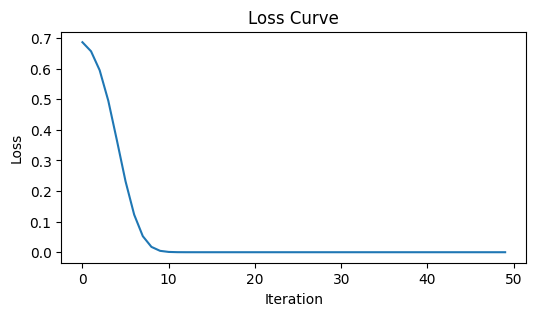

In [ ]:
#查看损失函数,这段代码在徐州时进行修改，确保能多次运行而不会出错。
loss_remember_AE_1=loss_remember_AE

import matplotlib.pyplot as plt
import numpy as np

losses = [loss.detach().numpy() if isinstance(loss, torch.Tensor) else loss for loss in loss_remember_AE_1]

plt.figure(figsize=(6, 3))
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")


In [ ]:
# 获取嵌入
model.eval()
with torch.no_grad():
    embeddings, _ = model(graph_data.x, graph_data.edge_index)

print("Node embeddings shape:", embeddings.shape)


Node embeddings shape: torch.Size([463, 3])


In [ ]:
embeddings

tensor([[  9.8978,  -9.3840, -10.6397],
        [ 15.1645, -14.3150, -16.8199],
        [ 18.6255, -17.3984, -20.7797],
        ...,
        [  6.0913,  -5.6500,  -6.2651],
        [  6.3837,  -5.8738,  -6.5276],
        [  5.8609,  -5.1027,  -5.9445]])

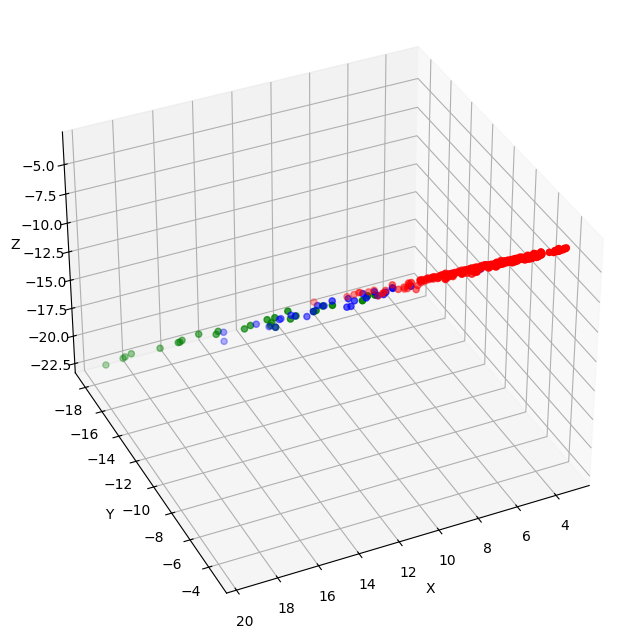

In [ ]:
# 将NumPy数组转换为Python列表
h_12= embeddings.tolist()
B_12=data.y.tolist()

# 提取h的坐标数据
x = [row[0] for row in h_12]
y = [row[1] for row in h_12]
z = [row[2] for row in h_12]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色
colors = ['red', 'blue', 'green']
label_set = set(B_12)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_12) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=35, azim=65)

# 显示图形
plt.show()

# 构建图神经网络之前的准备工作

In [71]:
# Install required packages.

import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

2.5.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**检查数据集结构是否一致**

In [72]:
from torch_geometric.data import Data

# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_label # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3   attribute_combined_1
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))

<ipython-input-72-d37cfe98f823>:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))


In [73]:
data  #检测数据格式是否正确  b是初始特征矩阵

Data(x=[473, 473], edge_index=[2, 1170], y=[473], z=[473], b=[473, 482], train_mask=[473])

In [74]:
data.edge_index.shape

torch.Size([2, 1170])

In [79]:
print(data.edge_index)

tensor([[  0,   0,   0,  ..., 471, 471, 472],
        [  1,  61, 309,  ..., 362, 470,  89]])


**设计一个绘图函数**

In [75]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

**设计一个可视化嵌入**

In [76]:
#这段代码目前把第？？个嵌入当成X轴，第？？个嵌入当成Y轴。 此处并非一成不变，要根据情况修改。
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    h = h.detach().cpu().numpy()
    scatter=plt.scatter(h[:, 2], h[:, 3], s=70, c=color, cmap="Set2")#Set2  cool


    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.colorbar(scatter)
    plt.show()

**用不同形状显示可视化嵌入（这段代码是为了制作图片非彩色图片备份。一般不执行此代码）**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch

def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    h = h.detach().cpu().numpy()
    color = color.detach().cpu().numpy()

    markers = ['o', '^', 's', 'p', '*', 'x', 'D', '+', 'v', '<', '>']  # 定义标记
    unique_colors = set(color)  # 获取唯一的类别

    for i, u_color in enumerate(unique_colors):
        marker = markers[i % len(markers)]  # 使用不同的标记
        mask = (color == u_color)
        #plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker, label=f'Class {u_color}')
        plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker)

    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)

    plt.legend()
    plt.show()

**开始可视化**

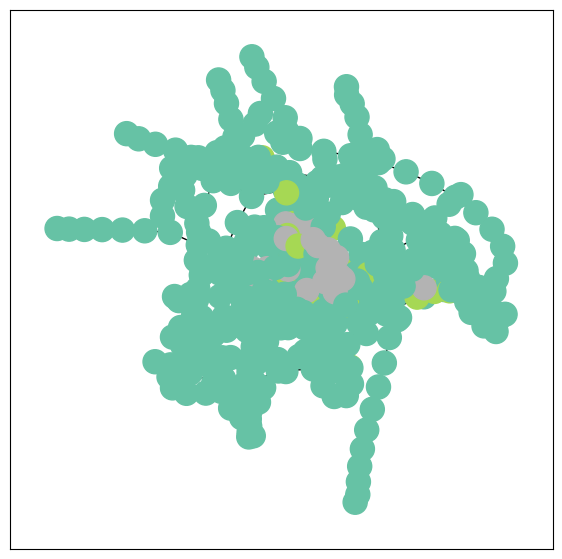

In [80]:
#这步是必要的，请观察是否有独立的节点。没有就是正常。
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

# 构建图神经网络

In [81]:
len(attribute_combined_1.T)#这是输入端的参数，扬州版本的代码相比福州的进步是：不再需要手动修改

482

In [82]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
#记得修改输入端的参数，必须保持一致

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(123)
        self.conv1 = GCNConv(len(attribute_combined_1.T), 128)

        self.conv2 = GCNConv(128, 32)

        self.conv3 = GCNConv(32, 6)

        self.classifier = Linear(6, 6)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()

        h = self.conv2(h, edge_index)
        h = h.tanh()

        h = self.conv3(h, edge_index)

        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(482, 128)
  (conv2): GCNConv(128, 32)
  (conv3): GCNConv(32, 6)
  (classifier): Linear(in_features=6, out_features=6, bias=True)
)


**观察嵌入**

Embedding shape: [473, 6]


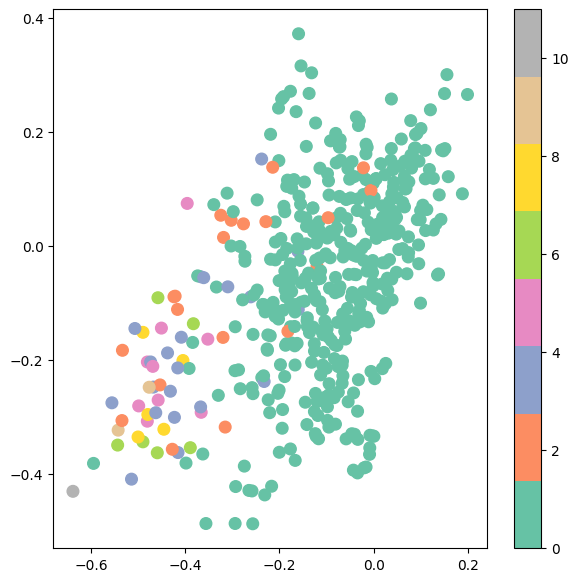

In [83]:
model = GCN()

_, h = model(data.b.float(), data.edge_index)

print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.z)   #data.y  data.z   如果不想要彩色，就用data.y

In [84]:
#再次检查数据结构
print(data.y[data.train_mask])
print(data.train_mask.shape)

tensor([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2])
torch.Size([473])


**开始训练模型**

In [85]:
import time
from IPython.display import Javascript  # Restrict height of output cell.

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.b.float(), data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask].long())  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h
loss_remember=[]
for epoch in range(501):
    loss, h = train(data)
    loss_remember.append(loss)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.z, epoch=epoch, loss=loss)
        time.sleep(0.1)

Output hidden; open in https://colab.research.google.com to view.

Text(0, 0.5, 'Loss')

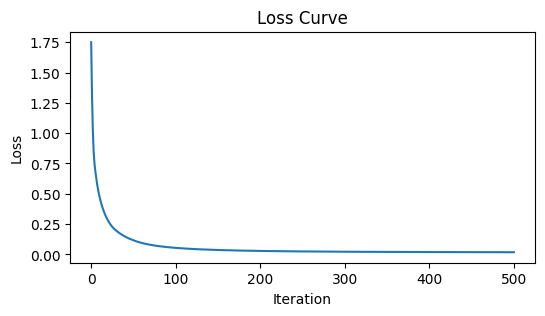

In [87]:
#查看损失函数,这段代码在徐州时进行修改，确保能多次运行而不会出错。
loss_remember_2=loss_remember

import matplotlib.pyplot as plt
import numpy as np

losses = [loss.detach().numpy() if isinstance(loss, torch.Tensor) else loss for loss in loss_remember_2]

plt.figure(figsize=(6, 3))
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")


In [88]:
print(h)
print(h.shape)

tensor([[ 0.9937,  0.8861,  0.9996, -0.9942, -0.9871,  0.9989],
        [-1.0000, -1.0000,  0.9998,  1.0000,  1.0000,  0.9996],
        [-1.0000, -1.0000,  0.9995,  1.0000,  1.0000,  0.9989],
        ...,
        [-1.0000, -1.0000,  0.9973,  1.0000,  1.0000,  0.9866],
        [-0.9999, -1.0000,  0.9982,  1.0000,  1.0000,  0.9906],
        [ 1.0000,  0.9988,  0.9992, -1.0000, -1.0000,  0.9989]],
       grad_fn=<TanhBackward0>)
torch.Size([473, 6])


# 通过线性分割获取历史城区节点

In [89]:
#节点和数字间的映射关系(翻转)
print(reversed_dict)

{'徐州站': '0', '万虹桥电子市场': '1', '供销大厦': '2', '古彭大厦': '3', '市二院': '4', '工人医院市口腔医院': '5', '矿务局华美商厦': '6', '段庄': '7', '六院': '8', '段南新村': '9', '公交修造厂': '10', '市中级法院': '11', '淮西客运站': '12', '荣盛城一期': '13', '荣盛城二期': '14', '第三十一中学(荣盛城分校)': '15', '荣盛城西': '16', '杏山子地铁站': '17', '箐英路': '18', '箐英路(尚和园)': '19', '开元四季': '20', '杏山子公交首末站': '21', '西苑人家': '22', '民乐园': '23', '西苑农贸市场': '24', '西苑东口': '25', '水漫桥': '26', '沈场市场': '27', '合群新村': '28', '苏堤北路立交桥': '29', '和园爱家': '30', '空军后勤学院': '31', '九龙湖公园': '32', '港南小区': '33', '建材中专': '34', '地质五队宿舍': '35', '堤北市场': '36', '下淀桥西': '37', '白云山': '38', '二七宿舍': '39', '大庆路': '40', '响山南路': '41', '奥运城': '42', '王杰部队': '43', '九七医院': '44', '城东快速路(振兴大道)': '45', '徐州东站北': '46', '徐州东站(东广场)': '47', '徐州乐园': '48', '矿大南湖校区北门': '49', '金山公园': '50', '云龙山索道': '51', '云龙湖旅游风景区': '52', '云龙山': '53', '云龙山东': '54', '积翠新村': '55', '南京银行': '56', '戏马台': '57', '户部山地铁站': '58', '云龙医院': '59', '彭城饭店': '60', '徐州站(朝阳)': '61', '四道街': '62', '地下道': '63', '下淀瑞博医院': '64', '下淀地铁站': '65', '二九宿舍': '66', '徐州物资市场': '6

In [90]:
H=[]
for  i in range(len(attribute_label)):
  if h[i][3]>0.0  :#and h[i][1]>=-1
    H.append(i)
  else:
     pass

H=np.array(H)

In [91]:
print(H.shape)
H

(72,)


array([  1,   2,   3,   4,   5,  53,  54,  55,  56,  57,  58,  59,  60,
        85,  86,  87, 119, 120, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 182, 183, 184, 202, 203, 216, 217,
       240, 241, 242, 255, 256, 257, 267, 268, 269, 272, 294, 295, 296,
       297, 298, 299, 347, 348, 362, 384, 385, 401, 420, 421, 422, 443,
       444, 445, 465, 466, 469, 470, 471])

In [92]:
new_list = []
for key in H:
  new_list.append(mapping_dict[str(key)])
new_list

['万虹桥电子市场',
 '供销大厦',
 '古彭大厦',
 '市二院',
 '工人医院市口腔医院',
 '云龙山',
 '云龙山东',
 '积翠新村',
 '南京银行',
 '戏马台',
 '户部山地铁站',
 '云龙医院',
 '彭城饭店',
 '建国小区',
 '恩华大厦',
 '袁桥',
 '淮塔北门',
 '淮塔南门',
 '奎园西门',
 '纪念塔',
 '市四院',
 '师大北门',
 '中医院',
 '中山饭店',
 '中山南路(中枢街)',
 '文化宫',
 '彭城广场',
 '金帝商都',
 '夹河街东口',
 '第一中学',
 '徐州博爱口腔医院',
 '黄河新村',
 '永安广场',
 '市二院南',
 '解放桥',
 '民主路小学',
 '苏宁广场东',
 '民主南路',
 '奎园北门',
 '文化宫(民主南路)',
 '第三中学',
 '创意68产业园',
 '夹河街西口',
 '金地商都',
 '凤鸣路',
 '牌楼',
 '市二院西门',
 '工商局',
 '云龙山隧道',
 '云龙公园北门',
 '海云大厦',
 '市交通银行',
 '青年路小学',
 '公园巷小学',
 '百惠家美时',
 '泉山医院',
 '吴庄小区',
 '妇幼保健院',
 '青年路口',
 '宣武市场(黄河西路)',
 '云龙湖旅游风景区(云龙公园)',
 '竹林寺',
 '金狮小区(和平大厦)',
 '黄山垅地铁站',
 '灯塔农贸市场',
 '血液中心站',
 '云龙湖旅游风景区(云龙公园）',
 '江苏模特艺术学校',
 '徐州八一中心幼儿园',
 '彭城派出所',
 '丰储街-奎河交界',
 '马鞍桥']

**寻找new_list之间的链接关系(获取节点的邻居)**

In [93]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G_new = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G_new.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']
    attr4 = row['300M内文保单位/古迹遗址/宗祠故地的个数']
    attr5 = row['800M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G_new.add_node(node)
        G_new.nodes[node]['区域属性'] = attr1
        G_new.nodes[node]['线路'] = attr2
        G_new.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3

        G_new.nodes[node]['300M内文保单位/古迹遗址/宗祠故地的个数'] = attr4

        G_new.nodes[node]['800M内文保单位/古迹遗址/宗祠故地的个数'] = attr5


In [94]:
result = []
for m in new_list:
    neighbors = G_new.neighbors(m) # 获得节点m的所有邻居
    common_neighbors = [n for n in neighbors if n in new_list] # 保留那些在new_list中的邻居
    result.append([m + ":" + ", ".join(common_neighbors)])

result

[['万虹桥电子市场:供销大厦, 民主南路, 第三中学, 青年路口'],
 ['供销大厦:万虹桥电子市场, 古彭大厦, 彭城饭店, 中山南路(中枢街), 金地商都, 户部山地铁站'],
 ['古彭大厦:供销大厦, 市二院, 中山南路(中枢街), 金地商都'],
 ['市二院:古彭大厦, 工人医院市口腔医院, 徐州博爱口腔医院, 市二院西门'],
 ['工人医院市口腔医院:市二院, 市二院西门'],
 ['云龙山:云龙山东, 中医院'],
 ['云龙山东:云龙山, 积翠新村'],
 ['积翠新村:云龙山东, 南京银行'],
 ['南京银行:积翠新村, 戏马台, 市四院, 师大北门, 妇幼保健院'],
 ['戏马台:南京银行, 户部山地铁站'],
 ['户部山地铁站:戏马台, 云龙医院, 苏宁广场东, 建国小区, 供销大厦, 彭城派出所'],
 ['云龙医院:户部山地铁站, 彭城饭店, 建国小区, 解放桥'],
 ['彭城饭店:云龙医院, 供销大厦'],
 ['建国小区:云龙医院, 恩华大厦, 民主南路, 户部山地铁站, 彭城派出所'],
 ['恩华大厦:建国小区, 袁桥, 民主南路'],
 ['袁桥:恩华大厦'],
 ['淮塔北门:淮塔南门'],
 ['淮塔南门:淮塔北门'],
 ['奎园西门:纪念塔'],
 ['纪念塔:奎园西门, 市四院, 奎园北门'],
 ['市四院:纪念塔, 南京银行, 凤鸣路, 妇幼保健院, 奎园北门'],
 ['师大北门:南京银行, 中医院, 妇幼保健院, 云龙湖旅游风景区(云龙公园), 云龙湖旅游风景区(云龙公园）'],
 ['中医院:师大北门, 中山饭店, 云龙山'],
 ['中山饭店:中医院, 中山南路(中枢街), 海云大厦, 市交通银行'],
 ['中山南路(中枢街):中山饭店, 供销大厦, 金地商都, 市二院南, 古彭大厦, 市交通银行'],
 ['文化宫:彭城广场'],
 ['彭城广场:文化宫, 金帝商都'],
 ['金帝商都:彭城广场, 夹河街东口'],
 ['夹河街东口:金帝商都, 第一中学, 金地商都, 牌楼'],
 ['第一中学:夹河街东口, 徐州博爱口腔医院, 夹河街西口'],
 ['徐州博爱口腔医院:第一中学, 黄河新村, 市二院'],
 ['黄河新村:徐州博爱口腔医院, 夹河街西口'],
 ['永安广场:市二院南,

**查询方式**

In [98]:
target = "古彭大厦"

matching_sublists = [sublist for sublist in result if target in sublist[0]]

matching_sublists

[['供销大厦:万虹桥电子市场, 古彭大厦, 彭城饭店, 中山南路(中枢街), 金地商都, 户部山地铁站'],
 ['古彭大厦:供销大厦, 市二院, 中山南路(中枢街), 金地商都'],
 ['市二院:古彭大厦, 工人医院市口腔医院, 徐州博爱口腔医院, 市二院西门'],
 ['中山南路(中枢街):中山饭店, 供销大厦, 金地商都, 市二院南, 古彭大厦, 市交通银行'],
 ['金地商都:夹河街东口, 供销大厦, 中山南路(中枢街), 牌楼, 古彭大厦']]

# **三维可视化**

In [99]:
h.shape
B=data.y
B.shape
# 将NumPy数组转换为Python列表
h_1= h.tolist()
B_1=B.tolist()

In [100]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

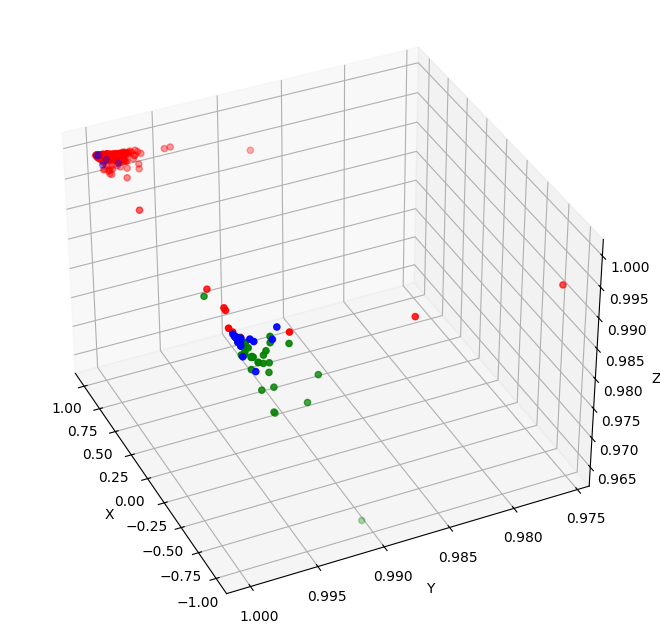

In [109]:
# 提取h的坐标数据
x = [row[0] for row in h_1]
y = [row[2] for row in h_1]
z = [row[5] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色   红：普通点 蓝色：边缘历史点 绿色：核心历史点
colors = ['red', 'blue', 'green']
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=35, azim=155)

# 显示图形
plt.show()